[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_21518/3726863028.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Option_Price'] = black_scholes(data['Close'], strike_price, time_to_maturity, risk_free_rate, data['Volatility'], option_type)
/tmp/ipykernel_21518/3726863028.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Implied_Volatility'] = data['Volatility']


SLA, (15, 11)
{'status': 'ok', 'totalResults': 295, 'articles': [{'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'kcloonan@insider.com (Kelly Cloonan)', 'title': "Tesla surges 13% as market sees Donald Trump's presidency benefiting key ally Elon Musk", 'description': "Tesla stock soared 13% on Wednesday after the election result. CEO Elon Musk was among Trump's most vocal and high-powered backers during the campaign.", 'url': 'https://markets.businessinsider.com/news/stocks/tesla-stock-price-trump-win-elon-musk-election-tsla-2024-11', 'urlToImage': 'https://i.insider.com/672b91f05ec9bfa3d63c18b8?width=1156&format=jpeg', 'publishedAt': '2024-11-06T16:29:17Z', 'content': 'Tesla investors are cheering the victory of Donald Trump over Kamala Harris on Wednesday, as Elon Musk and his companies could stand to benefit from a second Trump term. \r\nTesla stock soared as much … [+1659 chars]'}, {'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'auth

/tmp/ipykernel_21518/3726863028.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['Date'] = pd.to_datetime(tsla['Date'])


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3748
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3090
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2236
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0860
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0585
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0585
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0416
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0450
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0339
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0298
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0238
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0265
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0219
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0209
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0233
Epoch 16/100
5/5 ━━━━━━━━━━━━━━

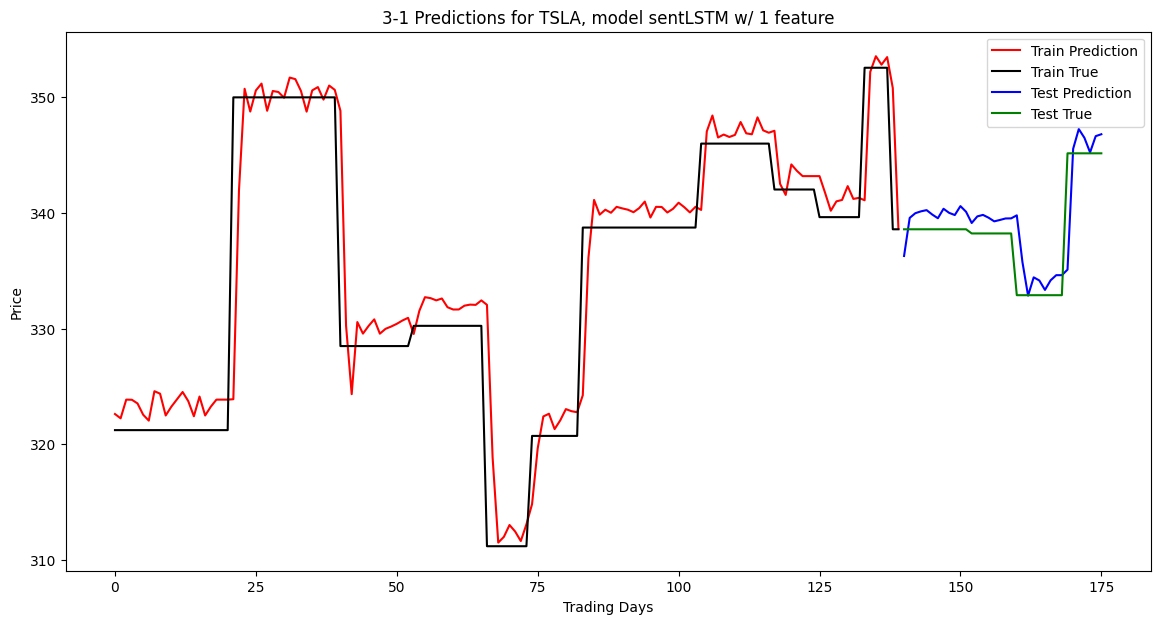

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from scipy.linalg import svd
import matplotlib.pyplot as plt
import os
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Fetch stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Compute technical indicators
def compute_technical_indicators(data):
    data['SMA30'] = data['Close'].rolling(window=3).mean()
    data['SMA100'] = data['Close'].rolling(window=5).mean()
    vol_window = 3
    data['Volatility'] = data['Close'].pct_change().rolling(window=vol_window).std() * np.sqrt(252)
    return data.dropna()

# Black-Scholes option pricing model
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Add option pricing features
def add_option_pricing_features(data):
    strike_price = data['Close'] * 1.05
    time_to_maturity = 30 / 252
    risk_free_rate = 0.01
    option_type = 'call'
    data['Option_Price'] = black_scholes(data['Close'], strike_price, time_to_maturity, risk_free_rate, data['Volatility'], option_type)
    data['Implied_Volatility'] = data['Volatility']
    return data

# Normalize and preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled, scaler

# Create sequences for time-series prediction
def create_sequences(data, seq_len, pred_len):
    sequences = []
    for i in range(len(data) - seq_len - pred_len + 1):
        sequences.append(data[i:i + seq_len + pred_len])
    return np.array(sequences)

# Create a Hankel matrix
def create_hankel_matrix(time_series, window_size):
    return np.array([time_series[i:i + window_size] for i in range(len(time_series) - window_size + 1)])

# Perform SVD on the Hankel matrix
def hankel_svd(hankel_matrix):
    U, Sigma, Vt = svd(hankel_matrix, full_matrices=False)
    return U, Sigma, Vt

# Build LSTM model
def build_model(input_shape, output_len):
    # model = Sequential([
    #     LSTM(200, activation='relu', return_sequences=False),
    #     # Dense(180), LeakyReLU(),
    #     # Dense(360), LeakyReLU(),
    #     # Dense(360), LeakyReLU(),
    #     Dense(output_len)
    # ])
    model = Sequential([
    LSTM(200, activation='relu', return_sequences=True),
    LSTM(100, activation='relu', return_sequences=False),
    Dense(50), LeakyReLU(),
    # Dropout(0.2),
    Dense(output_len)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Fetch news and perform sentiment analysis
def fetch_news_and_sentiment(ticker, start_date, end_date):
    headlines, dates = [], []
    analyzer = SentimentIntensityAnalyzer()
    curr_page = 1

    while len(headlines) < 1000:
        api_url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&apiKey=7e9676fa277d423f8deff9a4894bd717&page={curr_page}&language=en"
        response = requests.get(api_url)
        news_data = response.json()
        print(news_data)
        if "articles" in news_data:
            for article in news_data['articles']:
                headlines.append(article['title'])
                dates.append(article['publishedAt'][:10])
        curr_page += 1
        if len(news_data['articles']) == 0: break

    sentiment_data = []
    for headline, date in zip(headlines, dates):
        score = analyzer.polarity_scores(headline)
        sentiment_data.append({'date': date, 'sentiment': score['compound']})
    return sentiment_data

# Predict and plot results

def predict_and_plot(m, ticker, data, s, model, seq_len, pred_len, scaler, cut_off):
    plt.figure(figsize=(14, 7))

    rmse_values = []  # To store RMSE values for each section
    section_start_idx = []  # To store the start indices of each 30-day section for placement of RMSE labels
    #s.shape[0]
    pred_count = 0
    red_x,red_y, black_y, blue_x, blue_y, green_y = [],[],[],[],[],[]

    for idx in range(0,s.shape[0], pred_len):  # Loop through each 30-day block
        print("IDX",idx)
    # for idx in range(1): # only first 30 after being trained
        # Input remains in 3D for predictio
        future_input = s[idx, :seq_len, :].reshape(1, seq_len, -1)  # Keep the 3D shape
        future = model.predict(future_input)[0]  # Predict future "Close" prices
        # Pad the prediction with zeros for the "Volume" and "SMA" columns
        future_padded = np.hstack((future.reshape(-1, 1), np.zeros((future.shape[0], data.shape[1] - 1))))  # Adjust for PCA features

        # Inverse transform the padded prediction
        future_transform = scaler.inverse_transform(future_padded)[:, 0]  # Extract "Close"

        # Extract and inverse transform the true "Close" values
        future_true = s[idx, seq_len:, 0].reshape(-1, 1)  # Use only "Close"
        future_true_padded = np.hstack((future_true, np.zeros((future_true.shape[0], data.shape[1] - 1))))  # Adjust for PCA features
        future_true_transform = scaler.inverse_transform(future_true_padded)[:, 0]  # Extract "Close"

        # Calculate RMSE for this 30-day section
        rmse = np.sqrt(mean_squared_error(future_true_transform, future_transform))
        rmse_values.append(rmse)
        section_start_idx.append(idx)  # Store the start index for the RMSE label
        if idx< cut_off:
            red_x +=[idx]
            red_y+=[future_transform]
            black_y+=[future_true_transform]
        else:
            blue_x +=[idx]
            blue_y+=[future_transform]
            green_y+=[future_true_transform]

        # # Plot the predictions
        # plt.scatter(idx, future_transform, 
        # # label="Train Prediction" if idx < cut_off else "Test Prediction", 
        #     color="red" if idx < cut_off else "blue")


        # # plt.plot(np.arange(idx, idx + pred_len), future_transform, 
        # #         # label="Train Prediction" if idx < cut_off else "Test Prediction", 
        # #          color="red" if idx < cut_off else "blue")

        # # Plot the true values
        # plt.scatter(idx, future_true_transform, 
        #          #label="Train True" if idx < cut_off else "Test True", 
        #          color="black" if idx < cut_off else "green")

        
        if idx >= cut_off:
            pred_count+=1
    plt.plot(red_x, red_y, color = "red")
    plt.plot(red_x, black_y, color = "black")
    plt.plot(blue_x, blue_y, color = "blue")
    plt.plot(blue_x, green_y, color = "green")
    # Add legend and grid
    # plt.legend(["Train Prediction", "Train True", "Test Prediction", "Test True"])
    plt.plot([], [], color="red", label="Train Prediction")  # Dummy plot for legend
    plt.plot([], [], color="black", label="Train True")      # Dummy plot for legend
    plt.plot([], [], color="blue", label="Test Prediction")  # Dummy plot for legend
    plt.plot([], [], color="green", label="Test True")      # Dummy plot for legend
    plt.legend()
    # for idx in range(0, s.shape[0], pred_len): 
    # Add vertical line to separate each 30-day section
        # plt.axvline(x=idx + pred_len, color='gray', linestyle='--', linewidth=1)
    # Title and labels
    
    plt.title(f"{seq_len}-{pred_len} Predictions for {ticker}, model {m}")
    plt.xlabel("Trading Days")
    plt.ylabel("Price")

    # Add RMSE labels below the x-axis at the start of each 30-day section
    # for i, rmse in zip(section_start_idx, rmse_values):
    #     plt.text(i + pred_len / 2, min(plt.ylim()), f"{rmse:.0f}", color="teal", fontsize=10, ha='center', va='top')
    # plt.text(- 5- pred_len / 2, min(plt.ylim()), f"RMSE", color="teal", fontsize=10, ha='center', va='top')
    # print(rmse_values)
    # plt.grid(True)

    if m == "sentLSTM w/ 1 feature":
        dir = f"sentLSTM/{seq_len}-{pred_len}/sentLSTM_1"
        if not os.path.exists(dir):
                os.makedirs(dir)
        plt.savefig(f"{dir}/{ticker}.png")
    return np.mean(rmse_values[-pred_count]) # testing rmse


# Main workflow
# def main(tickers):
#     m = "sentLSTM w/ 1 feature"
#     test_rmse = []
#     for ticker in tickers:
#         tsla = fetch_stock_data(ticker, start_date="2024-11-03", end_date="2024-12-01")
#         tsla = compute_technical_indicators(tsla)
#         tsla = add_option_pricing_features(tsla)

#         sentiment_data = fetch_news_and_sentiment(ticker, "2024-11-03", "2024-12-01")
#         sentiment_df = pd.DataFrame(sentiment_data)
#         sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
#         tsla.reset_index(inplace=True)  # Make the index a regular column
#         tsla['Date'] = pd.to_datetime(tsla['Date'])  # Ensure Date is a proper datetime type
#         sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])  # Ensure date compatibility

#         # Merge on the Date and date columns
#         tsla = pd.merge(tsla, sentiment_df, left_on='Date', right_on='date', how='left')
#         tsla['sentiment'] = tsla['sentiment'].fillna(0)  # Fill missing sentiment with 0
#         #'Volume', 'SMA30', 'SMA100', 'Volatility', 

#         features = ['Close', 'sentiment']
#         data = tsla[features].copy()
#         processed_data, scaler = preprocess_data(data)
        
def main(tickers):
    m = "sentLSTM w/ 1 feature"
    test_rmse = []
    for ticker in tickers:
        tsla = fetch_stock_data(ticker, start_date="2024-11-03", end_date="2024-12-01")
        if tsla.empty:
            print(f"No data fetched for {ticker}")
            continue

        tsla = compute_technical_indicators(tsla)
        if tsla.empty:
            print(f"Technical indicators computation resulted in empty data for {ticker}")
            continue

        tsla = add_option_pricing_features(tsla)
        if tsla.empty:
            print(f"Option pricing features resulted in empty data for {ticker}")
            continue

        sentiment_data = fetch_news_and_sentiment(ticker, "2024-11-03", "2024-12-01")
        sentiment_df = pd.DataFrame(sentiment_data)
        print("SLA,", sentiment_df.shape)
        sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
        tsla.reset_index(inplace=True)
        tsla['Date'] = pd.to_datetime(tsla['Date'])
        sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

        tsla = pd.merge(tsla, sentiment_df, left_on='Date', right_on='date', how='left')
        tsla['sentiment'] = tsla['sentiment'].fillna(0)
        print(tsla.shape)
        features = ['Close', 'sentiment']
        # features = ['Close', 'Volume', 'SMA30', 'SMA100', 'Volatility', 'Option_Price']
        data = tsla[features].copy()
        if data.empty:
            print(f"No valid data after filtering for {ticker}")
            continue

        print(f"Data shape before preprocessing: {data.shape}")
        processed_data, scaler = preprocess_data(data)

        window_size = 2
        hankel_matrix = create_hankel_matrix(data['Close'].values, window_size)
        U, Sigma, Vt = hankel_svd(hankel_matrix)
        dmd_modes = U[:, :2]
        processed_data_trimmed = processed_data[-dmd_modes.shape[0]:]
        data_combined = np.hstack((processed_data_trimmed, dmd_modes))

        data_combined = processed_data_trimmed

        seq_len, pred_len = 3, 1
        sequences = create_sequences(data_combined, seq_len, pred_len)

        cut_off = int(0.8 * sequences.shape[0])
        print("cutoff",cut_off)
        print("Data.shape", data_combined.shape)

        X_train = sequences[:cut_off, :seq_len, :]
        X_test = sequences[cut_off:, :seq_len, :]
        y_train = sequences[:cut_off, seq_len:, 0]
        y_test = sequences[cut_off:, seq_len:, 0]

        model = build_model(input_shape=(seq_len, X_train.shape[2]), output_len=pred_len)
        model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

        test_rmse += [predict_and_plot(m, ticker, data_combined, sequences, model, seq_len, pred_len, scaler, cut_off)]
    print(f"Average Test RMSE: {np.mean(test_rmse)}")

# Example usage
main(["TSLA"])
